In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Ejercicio 3

##### Primer conjunto de datos

In [165]:
x = [-1,0,2,3]
y = [-1,3,11,27]

tabla = pd.DataFrame({'x': x, 'y': y})

print(tabla)

   x   y
0 -1  -1
1  0   3
2  2  11
3  3  27


In [166]:
def matriz_van_der_monde(valores_x, grado):

    A = [[1] * len(valores_x)]

    for i in range(1, grado + 1):

        fila = []

        for j in range(len(valores_x)):
            fila.append(valores_x[j] ** i)
        
        A.append(fila)

    return np.transpose(np.array(A))

In [180]:
b = np.array(list(tabla['y']))

# polinomio grado 1
A = matriz_van_der_monde(list(tabla['x']), 1)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio1 = np.poly1d(x)

# polinomio grado 2
A = matriz_van_der_monde(list(tabla['x']), 2)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio2 = np.poly1d(x)

# polinomio grado 3
A = matriz_van_der_monde(list(tabla['x']), 3)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio3 = np.poly1d(x)

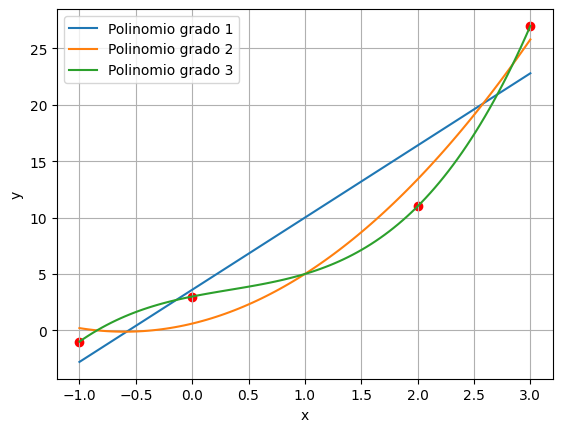

In [181]:
x = np.linspace(-1, 3, 100)
plt.plot(x, polinomio1(x), label='Polinomio grado 1')
plt.plot(x, polinomio2(x), label='Polinomio grado 2')
plt.plot(x, polinomio3(x), label='Polinomio grado 3')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##### Segundo conjunto de datos

In [182]:
x = [-1,0,1,2]
y = [-3,1,1,3]

tabla = pd.DataFrame({'x': x, 'y': y})

print(tabla)

   x  y
0 -1 -3
1  0  1
2  1  1
3  2  3


In [183]:
b = np.array(list(tabla['y']))

# polinomio grado 1
A = matriz_van_der_monde(list(tabla['x']), 1)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio1 = np.poly1d(x)

# polinomio grado 2
A = matriz_van_der_monde(list(tabla['x']), 2)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio2 = np.poly1d(x)

# polinomio grado 3
A = matriz_van_der_monde(list(tabla['x']), 3)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio3 = np.poly1d(x)

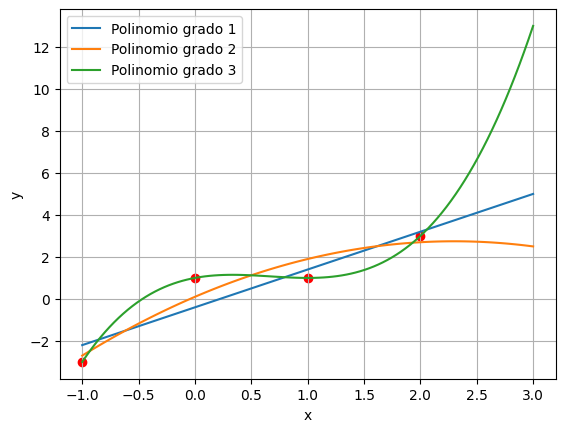

In [184]:
x = np.linspace(-1, 3, 100)
plt.plot(x, polinomio1(x), label='Polinomio grado 1')
plt.plot(x, polinomio2(x), label='Polinomio grado 2')
plt.plot(x, polinomio3(x), label='Polinomio grado 3')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Ejercicio 5

##### Inciso A

In [185]:
x = [1950,1960,1970,1980,1990,2000]
y = [17,20.5,23.9,27.9,32.6,36.9]

tabla = pd.DataFrame({'x': x, 'y': y})

print(tabla)

      x     y
0  1950  17.0
1  1960  20.5
2  1970  23.9
3  1980  27.9
4  1990  32.6
5  2000  36.9


In [198]:
polinomio = np.poly1d( np.polyfit(tabla['x'], tabla['y'], 1) )

In [199]:
print(polinomio)

 
0.3994 x - 762.4


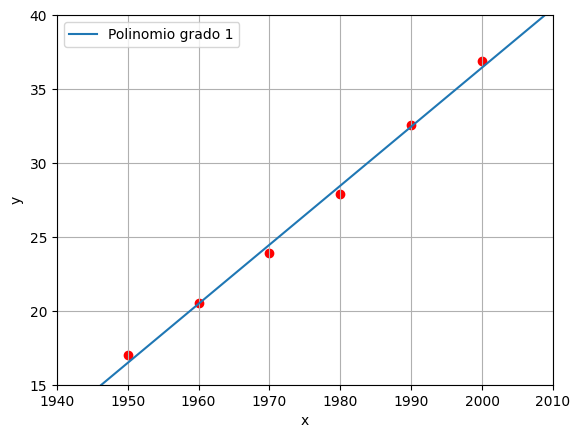

In [215]:
x = np.linspace(17, 2010, 200)
plt.plot(x, polinomio(x), label='Polinomio grado 1')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlim(1940, 2010)
plt.ylim(15, 40)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##### Inciso B
Agregamos nuevos valores x y partimos de un polinomio previamente calculado

In [224]:
x = [1955,1965,1975,1985,1995]
y = []
for x_i in x:
    print("Poblacion",x_i,"=",round(polinomio(x_i), 1),"millones")
    y.append(polinomio(x_i))

Poblacion 1955 = 18.5 millones
Poblacion 1965 = 22.5 millones
Poblacion 1975 = 26.5 millones
Poblacion 1985 = 30.5 millones
Poblacion 1995 = 34.5 millones


##### Inciso C

Este fue nuestro error de los datos reales

In [226]:
y_reales = [18.8,22.2,25.9,30.2,34.8]

In [232]:
error = np.linalg.norm( np.array(y_reales) - np.array(y) )
print("error absoluto =", error)

error absoluto = 0.8281799841626337


Es decir erramos en general un aproximado de 0.83 millones de habitantes

In [234]:
error = np.linalg.norm( np.array(y_reales) - np.array(y) ) / np.linalg.norm( np.array(y_reales) )
print("error relativo =", error)

error relativo = 0.013726629036303142


Porcentualmente tenemos un error del 1.36% !

Graficamos estos nuevos valores (y_reales) y lo comparamos con nuestro polinomio

In [241]:
x = [1955,1965,1975,1985,1995]
y_reales = [18.8,22.2,25.9,30.2,34.8]
tabla = pd.DataFrame({'x': x, 'y': y})

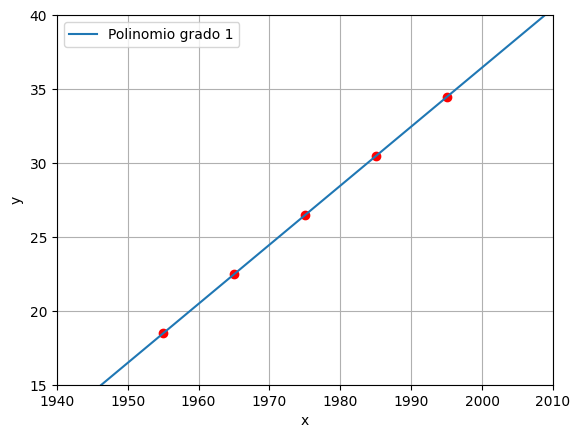

In [242]:
x = np.linspace(17, 2010, 200)
plt.plot(x, polinomio(x), label='Polinomio grado 1')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlim(1940, 2010)
plt.ylim(15, 40)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Observemos como el poloniomio pasa muy cercano a los puntos, pues tenemos 1,36% de error. 

Entonces podemos decir que la inferencia en el Inciso B es bastante buena!